# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There does not seem to any correlation of latitude to cloudiness, windspeed or humidity. More historical analysis of weather data may be needed to infer any correlations between latitude and cloudiness, windspeed or humidity.
* There does seem to be a concentration of data around 45-50 % humidity. This value is considered very conducive for humans.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
from pprint import pprint
from citipy import citipy
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
api_key = "7920ee9f913f328be66bfc71d09da1cb"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#urlw for openweather
#url = "http://api.openweathermap.org/data/2.5/weather?"
cnt=0
latlist=list()
longlist=list()

for k in range(-180,181,20):
    longlist.append(k)
#longlist=[-180,-160,-140,-120,-100,-8-75,-50,0,50,75,100,150,175]

#list of cities
cityset=set()

#list of countries corresponding to the city.
cnylist=list()
#create list of longitudes for use as a random choice

for i in range(-90,90,+2):
#use latitude choice from -90 to +90 and get a city closest to that latitude.
    for j in longlist:
        lat=i
        long=j
        city = citipy.nearest_city(lat, long)
        cityset.add(city.city_name)
        cnylist.append(city.country_code)
print(str(len(cityset)))
print(str(len(cnylist)))

555
1710


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)
#print(api_key)

http://api.openweathermap.org/data/2.5/weather?appid=7920ee9f913f328be66bfc71d09da1cb&units=metric&q=


## Loop Cities & Weather Data

In [5]:
# Get current weather for all the cities using openweathermapy. 
#initialize count variables. 
cntcity=0
cntfail=0
     
# set up lists to hold reponse info
citylist=list()
cloudiness=list()
temp = list()
cnycode=list()
date=list()
humidity=list()
lat = list()
long=list()
tempmax=list()
windspeed=list()

# Loop through the list of cities and perform a request for weather data on each city.store results in lists. 
for city in cityset:
    #print(str(city))
    cntcity=cntcity+1
    print("Retrieving  data for record " + str(cntcity) + " " + city)
    try:
        weatherdetails = requests.get(query_url + city).json()
        #pprint(weatherdetails)
        citylist.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        cnycode.append (weatherdetails["sys"]["country"])
        #datetime=weatherdetails["dt"]
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        lat.append (weatherdetails["coord"]["lat"])
        long.append (weatherdetails["coord"]["lon"])
        tempmax.append (weatherdetails["main"]["temp_max"])
        windspeed.append (weatherdetails["wind"]["speed"])
    except:
        cntfail +=1
        print("Error in getting data for city " + city)
        print("error code: " + weatherdetails["cod"])
        print("message: " + weatherdetails["message"])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(cntfail))

Retrieving  data for record 1 portobelo
Retrieving  data for record 2 carutapera
Retrieving  data for record 3 bethel
Retrieving  data for record 4 ilulissat
Retrieving  data for record 5 souillac
Retrieving  data for record 6 lowicz
Retrieving  data for record 7 fushe-arrez
Retrieving  data for record 8 redmond
Retrieving  data for record 9 coihaique
Retrieving  data for record 10 sao joao da barra
Retrieving  data for record 11 iqaluit
Retrieving  data for record 12 fernandez
Retrieving  data for record 13 shimoda
Retrieving  data for record 14 matranovak
Retrieving  data for record 15 rosarito
Retrieving  data for record 16 urengoy
Retrieving  data for record 17 karauzyak
Error in getting data for city karauzyak
error code: 404
message: city not found
Retrieving  data for record 18 cape coast
Retrieving  data for record 19 mangit
Retrieving  data for record 20 mogocha
Retrieving  data for record 21 channel-port aux basques
Retrieving  data for record 22 paitan
Retrieving  data for r

In [7]:
print(len(citylist))
print(len(cloudiness))
print(len(tempmax))
print(len(humidity))
print(len(lat))

503
503
503
503
503


## Store Within Dictionary & Convert to a Dataframe

In [8]:
#store results into a dictionary and convert to a dataframe. 
weatherdict=dict()
weatherdict={"City":citylist,"Cloudiness":cloudiness,"Country_code":cnycode,"Date":date,
             "Humidity":humidity,"Latitude":lat,"Longitude":long,"Max_temp":tempmax,
             "Wind_speed":windspeed}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
493,Ponta do Sol,36,BR,1554469747,82,-20.63,-46.00,23.68,1.92
494,Port Hawkesbury,90,CA,1554469738,58,45.62,-61.36,-0.57,12.30
495,Severodvinsk,40,RU,1554467400,64,64.56,39.82,3.00,4.00
496,Christchurch,76,NZ,1554469515,93,-43.53,172.64,7.22,5.10
497,Witu,20,KE,1554465360,70,-2.39,40.44,31.00,4.10
498,La Palma,80,CO,1554469749,92,5.36,-74.39,19.18,0.27
499,Mashhad,40,IR,1554467400,49,36.30,59.61,20.00,4.10
500,Avarua,76,CK,1554467400,94,-21.21,-159.78,22.00,0.50
501,Port Hardy,90,CA,1554465600,87,50.70,-127.42,9.00,7.70
502,Portland,90,US,1554469697,87,45.52,-122.67,10.56,3.10


In [9]:
#Save weather data in a csv file for future reference and use. 
weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
City            503 non-null object
Cloudiness      503 non-null int64
Country_code    503 non-null object
Date            503 non-null int64
Humidity        503 non-null int64
Latitude        503 non-null float64
Longitude       503 non-null float64
Max_temp        503 non-null float64
Wind_speed      503 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.4+ KB


In [10]:
#Import dependencies for plotting.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x_axis=weather_df["Latitude"]
y_axis_maxtemp=weather_df["Max_temp"]
y_axis_humidity=weather_df["Humidity"]
y_axis_cloudiness = weather_df["Cloudiness"]
y_axis_Windspeed = weather_df["Wind_speed"]

In [11]:
#Review cities that have temperature greater than 28 deg C.
weather_df.loc[weather_df["Max_temp"] >= 38]
#weather_df_sortedbytemp = weather_df.sort("Max_temp",axis=1,ascending=False,inplace=False)
#weather_df_sortedbytemp.head(10)

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
55,Gao,0,ML,1554469593,17,16.28,-0.04,39.43,7.17
102,Oum Hadjer,0,TD,1554469606,14,13.30,19.70,40.43,4.47
211,Pawai,0,IN,1554465600,16,24.27,80.17,41.00,2.60
256,Kidal,0,ML,1554469661,19,18.44,1.41,38.48,5.47
430,Am Timan,0,TD,1554469722,12,11.04,20.28,40.43,6.37
433,Biltine,0,TD,1554469723,13,14.53,20.93,38.43,2.52
479,Dori,32,BF,1554469741,25,14.03,-0.03,41.43,4.37


## Plot Lat vs Max Temp.

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


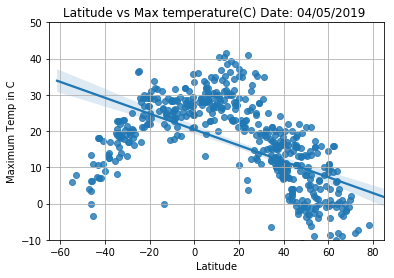

In [12]:
sns.regplot(x_axis, y_axis_maxtemp, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label="Latitude vs Max temperature(C)", 
            color=None,marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Max temperature(C) Date: 04/05/2019 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-10,50)
plt.ylabel("Maximum Temp in C")
plt.savefig("latvsMaxtemp.png")

## Plot Lat vs Humidity

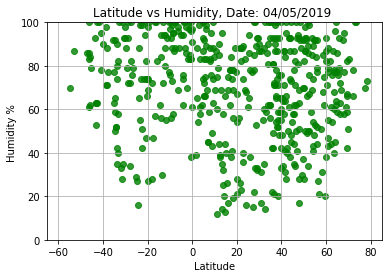

In [13]:
sns.regplot(x_axis, y_axis_humidity, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="g", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Humidity, Date: 04/05/2019 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-0,100)
plt.ylabel("Humidity % ")
plt.savefig("latvshumidity.png")

## Plot Lat vs Cloudiness

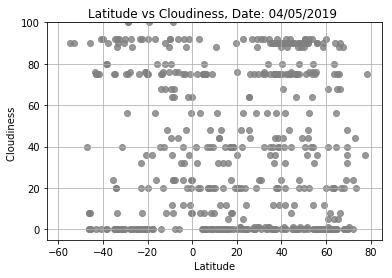

In [14]:
sns.regplot(x_axis, y_axis_cloudiness, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="grey", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Cloudiness, Date: 04/05/2019 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-5,100)
plt.ylabel("Cloudiness ")
plt.savefig("latvscloudiness.png")

## Plot Lat vs Windspeed

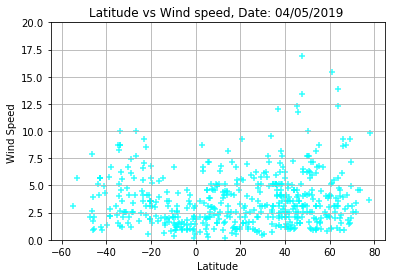

In [16]:
sns.regplot(x_axis, y_axis_Windspeed, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="cyan", 
            marker='+', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Wind speed, Date: 04/05/2019 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-0,20)
plt.ylabel("Wind Speed ")
plt.savefig("latvswindspeed.png")